In [1]:
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns

In [13]:
r = requests.get('http://ergast.com/api/f1/driverStandings/1.json', {"limit": 100})
standings_list = r.json()['MRData']["StandingsTable"]["StandingsLists"]
standings_list

[{'season': '1950',
  'round': '7',
  'DriverStandings': [{'position': '1',
    'positionText': '1',
    'points': '30',
    'wins': '3',
    'Driver': {'driverId': 'farina',
     'url': 'http://en.wikipedia.org/wiki/Nino_Farina',
     'givenName': 'Nino',
     'familyName': 'Farina',
     'dateOfBirth': '1906-10-30',
     'nationality': 'Italian'},
    'Constructors': [{'constructorId': 'alfa',
      'url': 'http://en.wikipedia.org/wiki/Alfa_Romeo_in_Formula_One',
      'name': 'Alfa Romeo',
      'nationality': 'Swiss'}]}]},
 {'season': '1951',
  'round': '8',
  'DriverStandings': [{'position': '1',
    'positionText': '1',
    'points': '31',
    'wins': '3',
    'Driver': {'driverId': 'fangio',
     'url': 'http://en.wikipedia.org/wiki/Juan_Manuel_Fangio',
     'givenName': 'Juan',
     'familyName': 'Fangio',
     'dateOfBirth': '1911-06-24',
     'nationality': 'Argentine'},
    'Constructors': [{'constructorId': 'alfa',
      'url': 'http://en.wikipedia.org/wiki/Alfa_Romeo_in_Fo

In [14]:
data_labels = ['season', 'points', 'wins', 'driver_name', 'driver_nationality', 'constructor_name', 'constructor_nationality']
data = []
for season in standings_list:
    points = float(season['DriverStandings'][0]['points'])
    wins = int(season['DriverStandings'][0]['wins'])
    driver_name = season['DriverStandings'][0]['Driver']['givenName'] + ' ' + season['DriverStandings'][0]['Driver']['familyName']
    driver_nationality = season['DriverStandings'][0]['Driver']['nationality']
    constructor_name = season['DriverStandings'][0]['Constructors'][0]['name']
    constructor_nationality = season['DriverStandings'][0]['Constructors'][0]['nationality']
    data.append((int(season['season']), points, wins, driver_name, driver_nationality, constructor_name, constructor_nationality))

df = pd.DataFrame(data, columns=data_labels)
df

,season,points,wins,driver_name,driver_nationality,constructor_name,constructor_nationality
0,1950,30.0,3,Nino Farina,Italian,Alfa Romeo,Swiss
1,1951,31.0,3,Juan Fangio,Argentine,Alfa Romeo,Swiss
2,1952,36.0,6,Alberto Ascari,Italian,Ferrari,Italian
3,1953,34.5,5,Alberto Ascari,Italian,Ferrari,Italian
4,1954,42.0,6,Juan Fangio,Argentine,Maserati,Italian
...,...,...,...,...,...,...,...
68,2018,408.0,11,Lewis Hamilton,British,Mercedes,German
69,2019,413.0,11,Lewis Hamilton,British,Mercedes,German
70,2020,347.0,11,Lewis Hamilton,British,Mercedes,German
71,2021,395.5,10,Max Verstappen,Dutch,Red Bull,Austrian


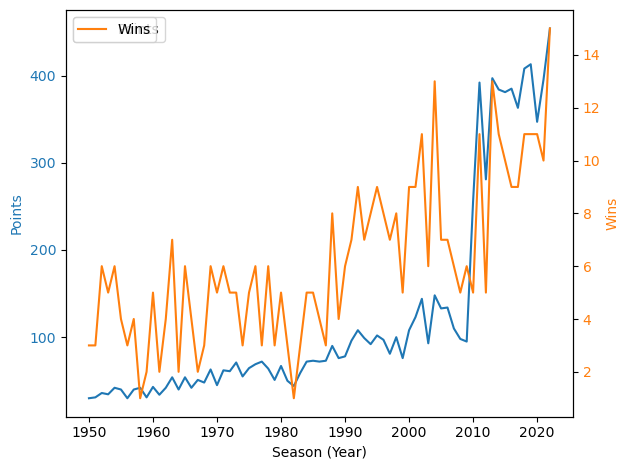

In [4]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Season (Year)')
ax1.set_ylabel('Points', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.plot(df['season'], df['points'], label='Points', color='tab:blue')
plt.legend()

ax2 = ax1.twinx()
ax2.set_ylabel('Wins', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
plt.plot(df['season'], df['wins'], label='Wins', color='tab:orange')

fig.tight_layout()
plt.legend()
plt.show()

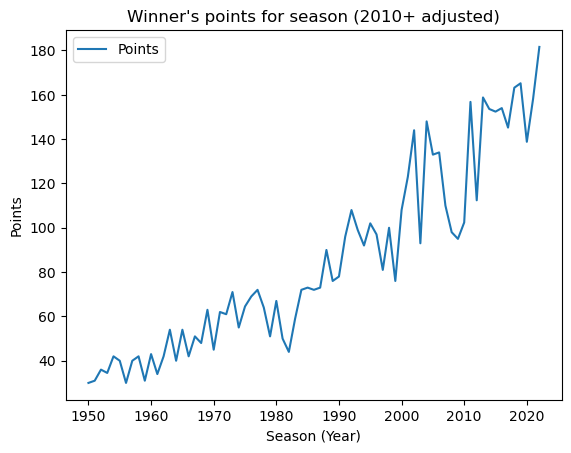

In [15]:
df['adjusted_points'] = df.apply(lambda x: x['points'] if x['season'] < 2010 else x['points']*2/5, axis=1)

plt.plot(df['season'], df['adjusted_points'], label='Points')
plt.title('Winner\'s points for season (2010+ adjusted)')
plt.xlabel('Season (Year)')
plt.ylabel('Points')
plt.legend()
plt.show()

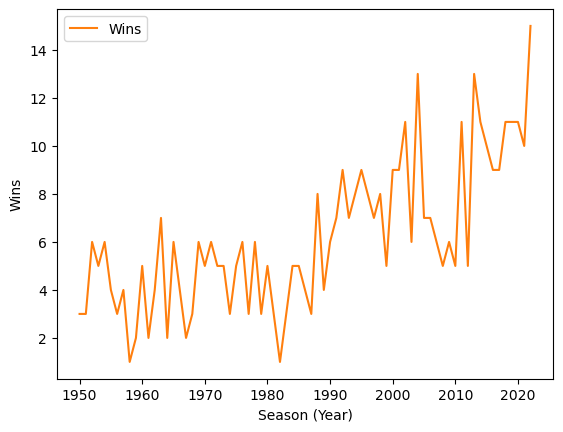

In [121]:
plt.plot(df['season'], df['wins'], label='Wins', color='tab:orange')
plt.title('Winner\'s wins for season')
plt.xlabel('Season (Year)')
plt.ylabel('Wins')
plt.legend()
plt.show()

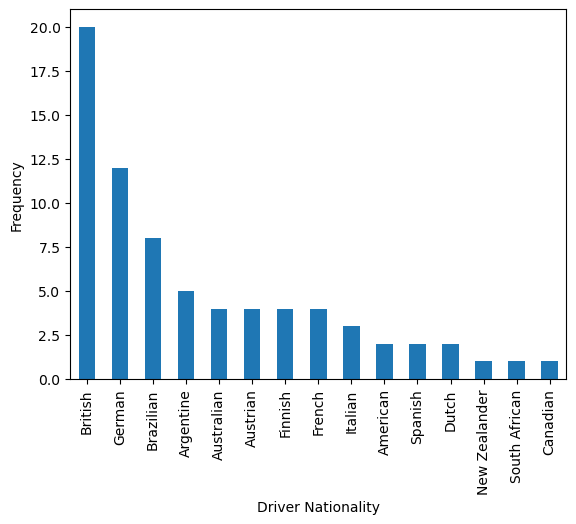

In [122]:
df['driver_nationality'].value_counts().plot(kind='bar')
plt.xlabel('Driver Nationality')
plt.ylabel('Frequency')
plt.show()

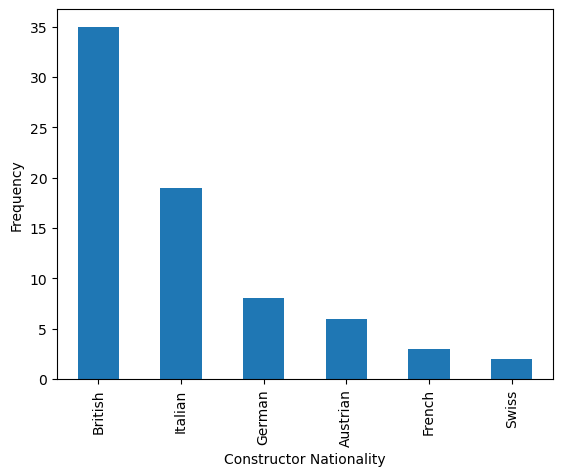

In [123]:
df['constructor_nationality'].value_counts().plot(kind='bar')
plt.xlabel('Constructor Nationality')
plt.ylabel('Frequency')
plt.show()

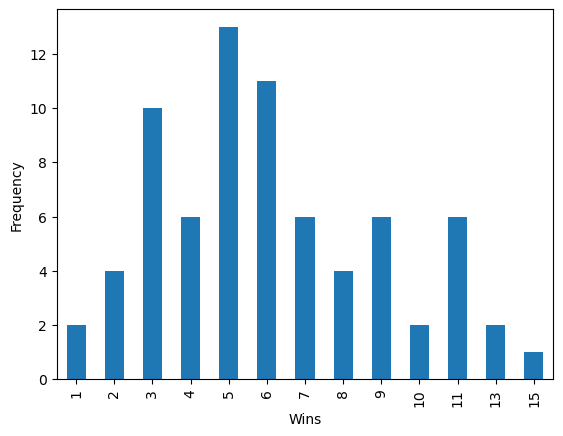

In [124]:
df['wins'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.show()

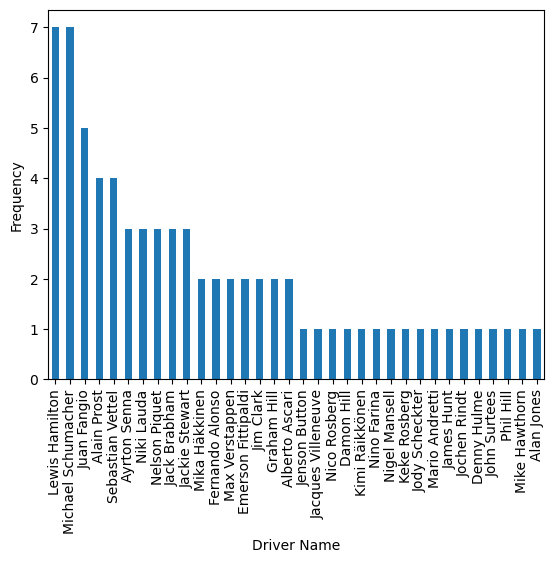

In [6]:
df['driver_name'].value_counts().plot(kind='bar')
plt.xlabel('Driver Name')
plt.ylabel('Frequency')
plt.show()

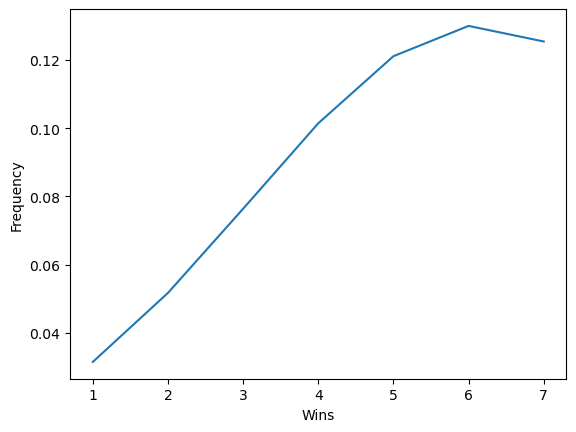

In [125]:
x_axis = np.arange(1,8)
plt.plot(x_axis, norm.pdf(x_axis, df['wins'].mean(), df['wins'].std()))
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.show()